# Compute lake area

### 0. Import libraries and load data

In [60]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-v0_8')

DATA_PATH = "../data/processed/"


In [105]:
# load water index map for one lake
water_index_maps = os.listdir(DATA_PATH)
water_index_map_ =  rasterio.open(DATA_PATH + water_index_maps[0])


### 1. Analyze the data

In [106]:
# compute the distances covered by this map
latitudinal_distance = water_index_map_.bounds.right - water_index_map_.bounds.left
longitudinal_distance = water_index_map_.bounds.top - water_index_map_.bounds.bottom

# create a list with descriptions of the data properties
data_descriptions = [
    f"The data has {water_index_map_.count} band(s).",
    f"The shape of the raster data is {water_index_map_.height} rows x {water_index_map_.width} columns.",
    f"The coordinate reference system is {water_index_map_.crs}. The bounds are relative to the origin of this crs.",
    f"The bounds of the data are: {water_index_map_.bounds}.",
    f"The map covers a latitudinal distance of {latitudinal_distance} m and a longitudinal distance of {longitudinal_distance} m.",
]

# concatenate in a string the described data properties
concatenated_data_description = "\n".join(data_descriptions)

# display various data properties
print(concatenated_data_description)

The data has 1 band(s).
The shape of the raster data is 2541 rows x 1325 columns.
The coordinate reference system is EPSG:32655. The bounds are relative to the origin of this crs.
The bounds of the data are: BoundingBox(left=714555.0, bottom=-3898765.0, right=727805.0, top=-3873355.0).
The map covers a latitudinal distance of 13250.0 m and a longitudinal distance of 25410.0 m.


In [115]:
# extract the band from the image
water_index_map = water_index_map_.read(1)

In [132]:
def plot_map(water_index_map):
    fig, ax = plt.subplots(1, 2) 
    fig.set_size_inches(10, 5)

    # plot the histogram of pixel-level water index
    ax[0].hist(water_index_map.flatten(), bins=100)
    ax[0].set_xlabel("Water index value")
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"Histogram of the pixel-level water index")

    # plot the water index map
    ax[1].imshow(water_index_map)
    ax[1].set_title("Water index map")
    ax[1].grid(False)

    plt.tight_layout()
    plt.show()

    # compute and display the minimum and maximum elevation values
    min_water_index = str(round(water_index_map.min(), 2))
    max_water_index = str(round(water_index_map.max(), 2))

    print(f"The minimum and maximum values of the water index are {min_water_index} and {max_water_index}.")

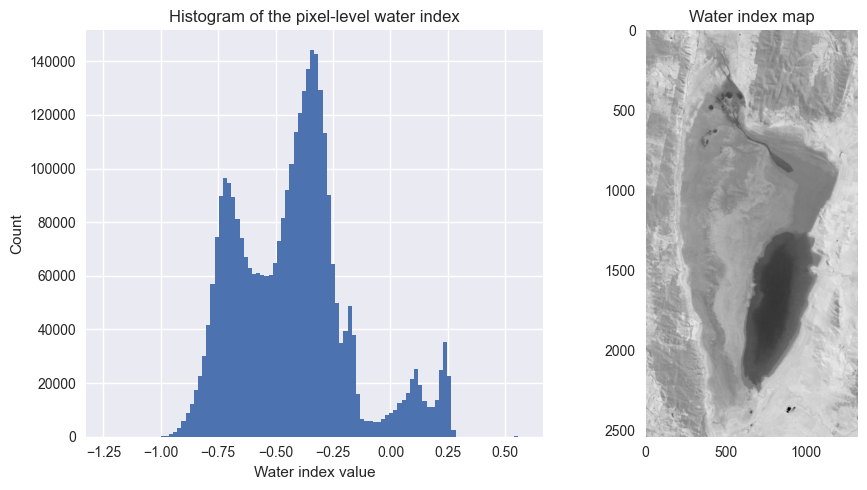

The minimum and maximum values of the water index are -1.24 and 0.57.


In [133]:
plot_map(water_index_map)

### 2. Detect the lake

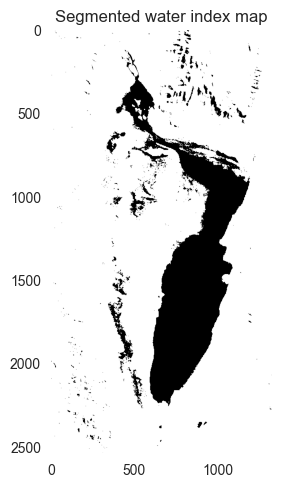

In [134]:
# segment the map and plot it
segmented_water_index_map = water_index_map > -0.25

fig, ax = plt.subplots(1, 1) 

ax.imshow(segmented_water_index_map)
ax.set_title("Segmented water index map")
ax.grid(False)